In [1]:
import netCDF4 as nc
import xarray as xr
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import LinearSegmentedColormap
import cartopy.crs as ccrs
import os
import math
#import imageio
from scipy.ndimage.interpolation import map_coordinates
from pprint import pprint
import glob
from scipy import interpolate
from scipy.interpolate import RegularGridInterpolator
from copy import copy
from copy import deepcopy

%matplotlib inline
from scipy import stats
import multiprocessing as mp
import matplotlib.patches as patches

_wbgyr_cdict = {'red': ((0.0,  255./255, 255./255),
                        (0.125, 173./255, 173./255),
                        (0.25,  95./255,  95./255),
                        (0.375, 73./255,  73./255),
                        (0.5,  165./255, 164./255),
                        (0.625, 248./255, 248./255),
                        (0.75, 236./255, 236./255),
                        (0.875, 200./255, 200./255),
                        (1.0,  146./255, 146./255)),
                'green': ((0.0,  255./255, 255./255),
                          (0.125, 224./255, 224./255),
                          (0.25, 163./255, 163./255),
                          (0.375, 166./255, 166./255),
                          (0.5,  207./255, 207./255),
                          (0.625, 184./255, 184./255),
                          (0.75,  86./255,  86./255),
                          (0.875, 29./255,  29./255),
                          (1.0,   21./255,  21./255)),
                'blue': ((0.0,  255./255, 255./255),
                         (0.125, 248./255, 248./255),
                         (0.25, 214./255, 214./255),
                         (0.375, 120./255, 120./255),
                         (0.5,   81./255,  81./255),
                         (0.625, 73./255,  73./255),
                         (0.75,  41./255,  41./255),
                         (0.875, 38./255,  38./255),
                         (1.0,   25./255,  25./255))}
# And reverse
_wbgyr_cdict_r = deepcopy(_wbgyr_cdict)
for i in _wbgyr_cdict_r.keys():
    _wbgyr_cdict_r[i] = [(1-j[0], j[1], j[2]) for j in _wbgyr_cdict_r[i]]
    _wbgyr_cdict_r[i].reverse()

cmap = LinearSegmentedColormap('WBGYR', _wbgyr_cdict)
cmap.set_bad('#D2D2D2')
plt.register_cmap(cmap=cmap)

cmap_r = LinearSegmentedColormap('WBGYR', _wbgyr_cdict_r)
cmap_r.set_bad('#D2D2D2')
plt.register_cmap(cmap=cmap_r)

In [46]:
f = np.zeros((2,3,17,4))
linregress_all=np.zeros((17,5))
slope_all= np.zeros(17)
intcp_all= np.zeros(17)
r_all = np.zeros(17)
pval_all = np.zeros(17)
cre_ctp_s_all = np.zeros(17)
se_all = np.zeros(17)

linregress_land=np.zeros((17,5))
slope_land= np.zeros(17)
intcp_land= np.zeros(17)
r_land = np.zeros(17)
pval_land = np.zeros(17)
cre_ctp_s_land = np.zeros(17)
se_land = np.zeros(17)

linregress_ocean=np.zeros((17,5))
slope_ocean= np.zeros(17)
intcp_ocean= np.zeros(17)
r_ocean = np.zeros(17)
pval_ocean = np.zeros(17)
cre_ctp_s_ocean = np.zeros(17)
se_ocean = np.zeros(17)

for i in range(0,17):

        
    
    f[0,0,i] = np.load('/disk1/Users/gah20/SensitivityWork/values/Forcings/forcingsLST2_'+str(2000+i)+'.npy')[0]
    f[0,1,i] = np.load('/disk1/Users/gah20/SensitivityWork/values/Forcings/forcingsLST2_land_'+str(2000+i)+'.npy')[0]
    f[0,2,i] = np.load('/disk1/Users/gah20/SensitivityWork/values/Forcings/forcingsLST2_ocean_'+str(2000+i)+'.npy')[0]

    f[1,0,i] = np.load('/disk1/Users/gah20/SensitivityWork/values/Forcings/forcingsLST2_'+str(2000+i)+'.npy')[1]
    f[1,1,i] = np.load('/disk1/Users/gah20/SensitivityWork/values/Forcings/forcingsLST2_land_'+str(2000+i)+'.npy')[1]
    f[1,2,i] = np.load('/disk1/Users/gah20/SensitivityWork/values/Forcings/forcingsLST2_ocean_'+str(2000+i)+'.npy')[1]



    #f[:,1,year-2000] = np.load('/net/hardin/disk1/Users/gah20/SensitivityWork/values/Forcings/forcingsLST2_land_'+str(year)+'.npy')
    #f[:,2,year-2000] = np.load('/net/hardin/disk1/Users/gah20/SensitivityWork/values/Forcings/forcingsLST2_ocean_'+str(year)+'.npy')


    linregress_all = stats.linregress(np.arange(0,4,1),y=f[0,0,i]+f[1,0,i])
    slope_all[i] = linregress_all[0]
    intcp_all[i] = linregress_all[1]
    r_all[i] = linregress_all[2]**2
    pval_all[i] = linregress_all[3]
    cre_ctp_s_all[i] = (slope_all[i]/18.75)
    se_all[i] = linregress_all[4]

    linregress_land = stats.linregress(np.arange(0,4,1),y=f[0,1,i]+f[1,1,i])
    slope_land[i] = linregress_land[0]
    intcp_land[i] = linregress_land[1]
    r_land[i] = linregress_land[2]**2
    pval_land[i] = linregress_land[3]
    cre_ctp_s_land[i] = (slope_land[i]/18.75)
    se_land[i] = linregress_land[4]

    linregress_ocean = stats.linregress(np.arange(0,4,1),y=f[0,2,i]+f[1,2,i])
    slope_ocean[i] = linregress_ocean[0]
    intcp_ocean[i] = linregress_ocean[1]
    r_ocean[i] = linregress_ocean[2]**2
    pval_ocean[i] = linregress_ocean[3]
    cre_ctp_s_ocean[i] = (slope_ocean[i]/18.75)
    se_ocean[i] = linregress_ocean[4]


f[:,:,9] = (f[:,:,8] + f[:,:,10])/2

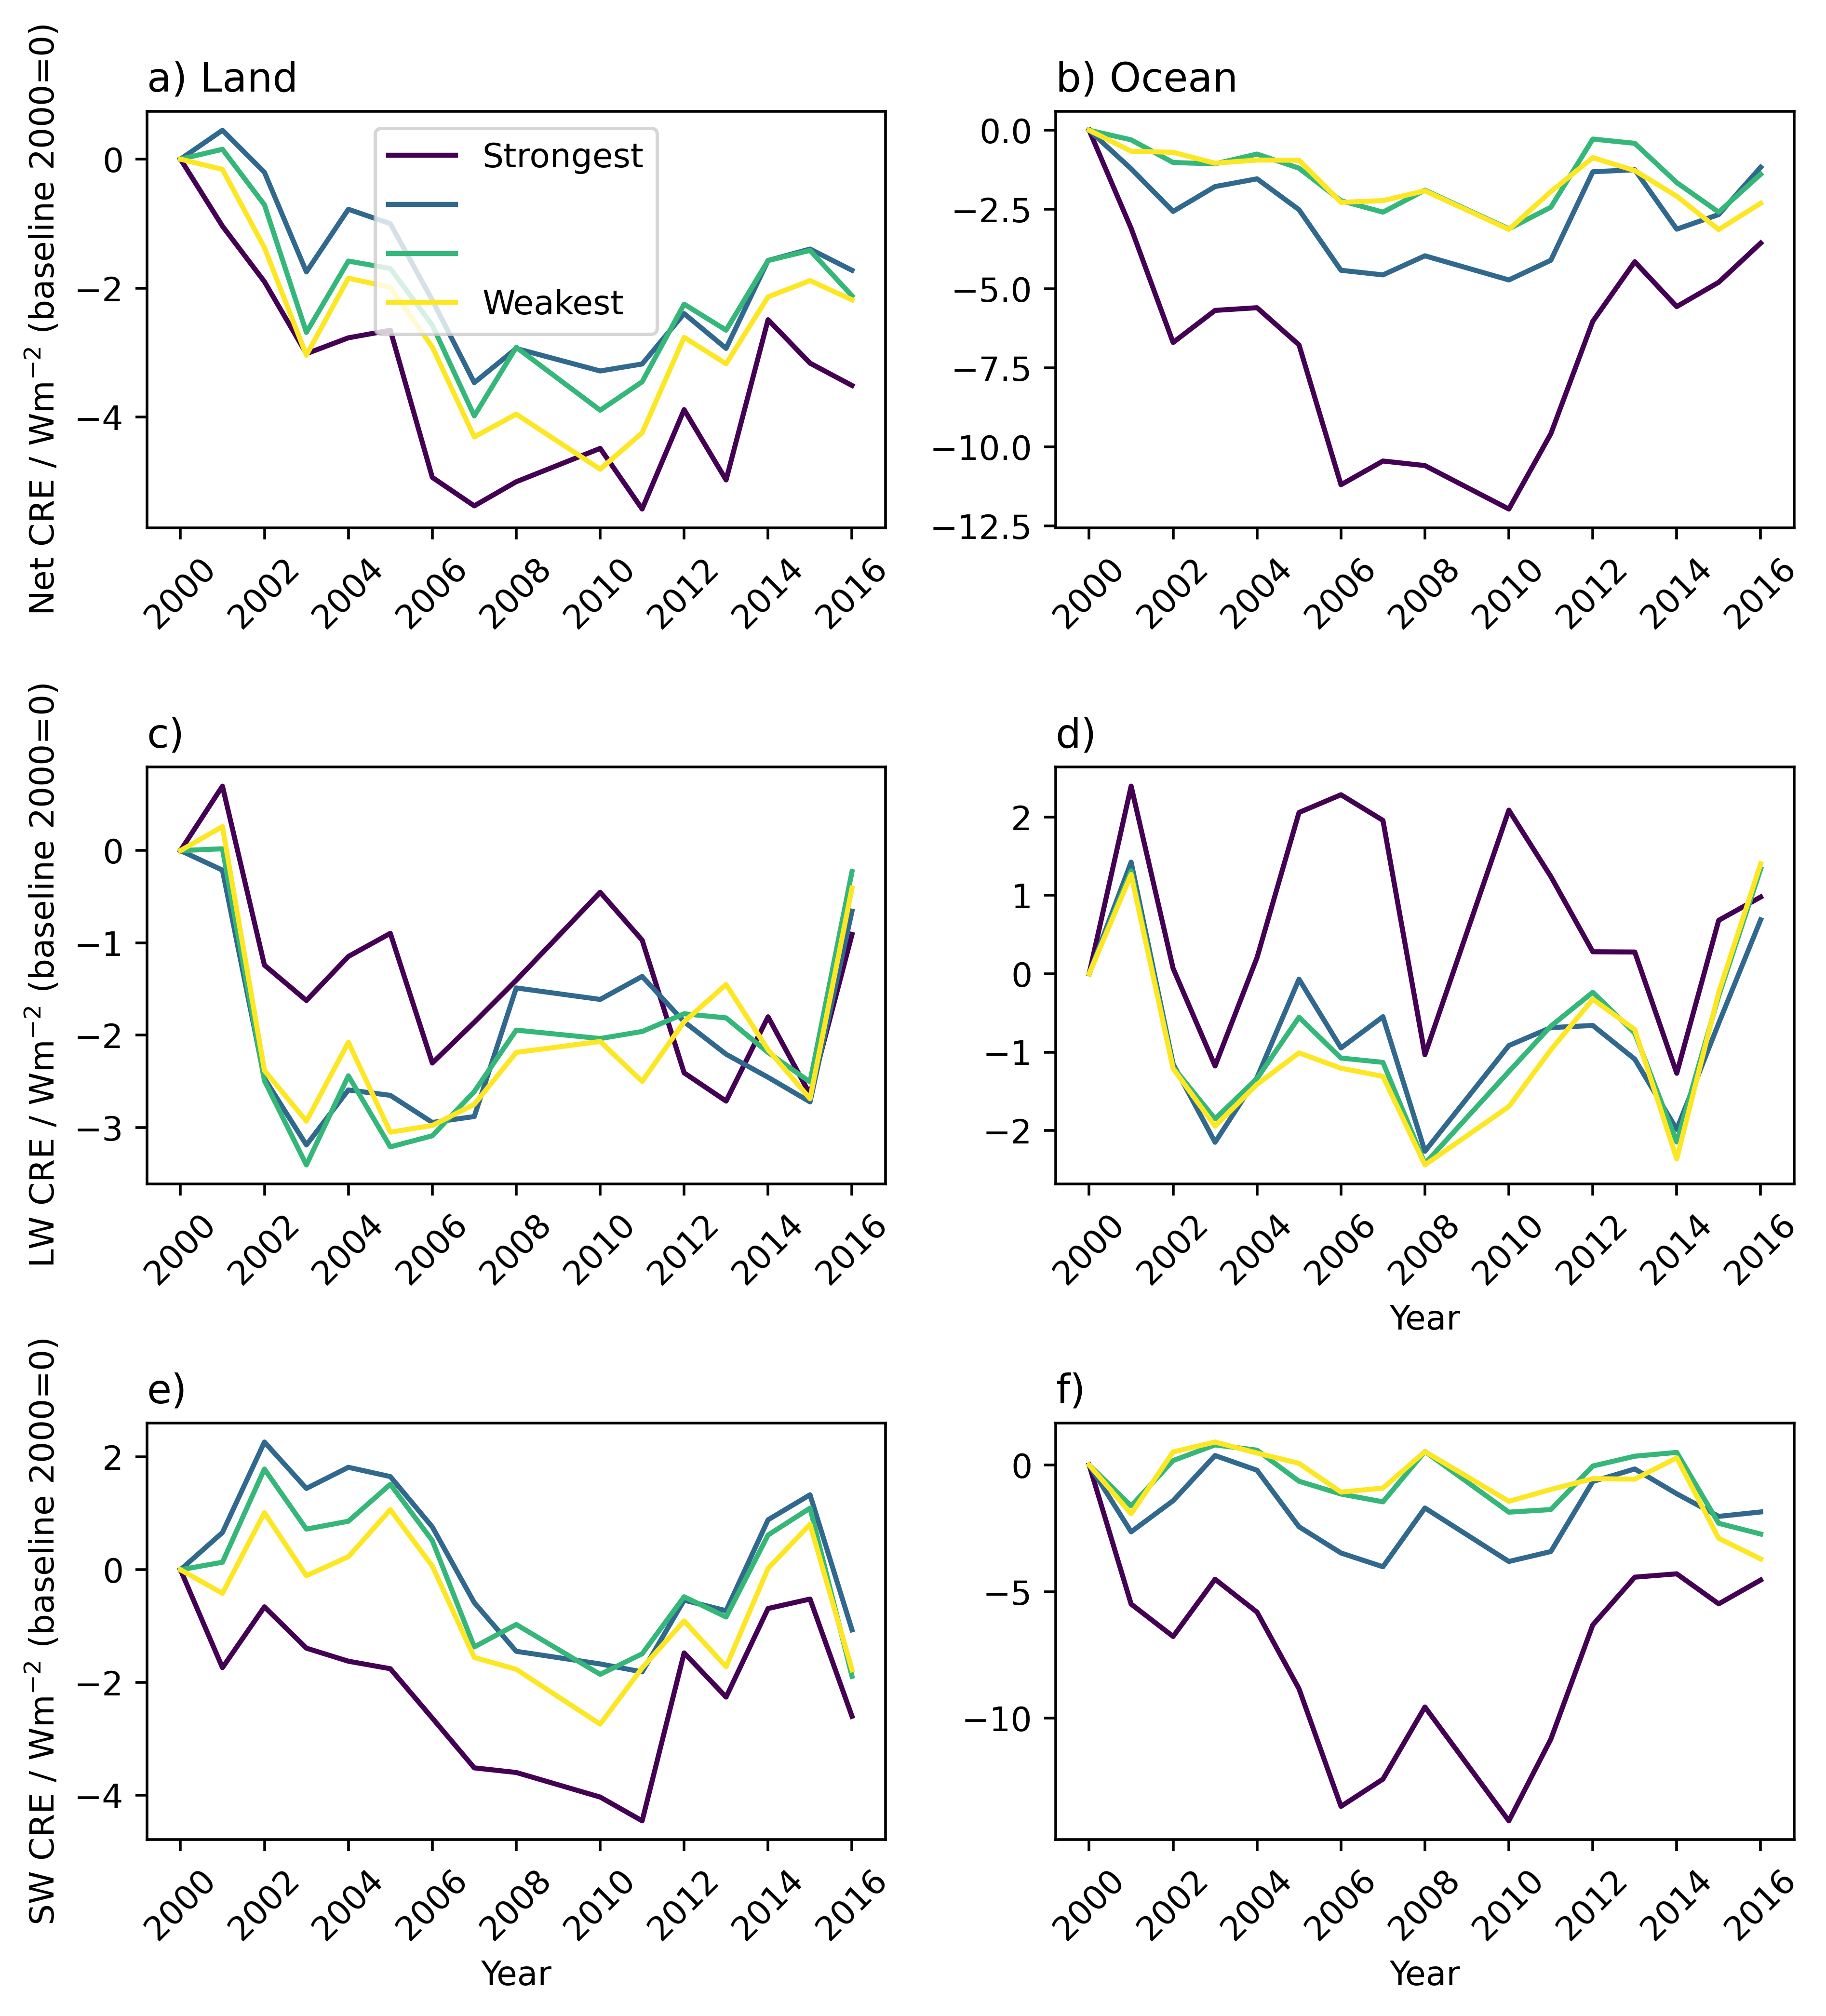

In [51]:
colors = plt.cm.viridis(np.linspace(0,1,4))
cm = 1/2.54 
labels = ['Strongest',' ',' ','Weakest']
fig = plt.figure(figsize=(19.5*cm,21.5*cm),dpi=500)
#sns.set_context('paper')
gs = fig.add_gridspec(3, 2)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[2,0])
ax6 = fig.add_subplot(gs[2,1])

for i in range(0,4,1):
    ax1.plot((f[0,1,:,i]+f[1,1,:,i]) - (f[0,1,0,i]+f[1,1,0,i]),color=colors[i],label=labels[i])
    ax2.plot((f[0,2,:,i]+f[1,2,:,i]) - (f[0,2,0,i]+f[1,2,0,i]),color=colors[i],label=labels[i])
    ax3.plot((f[0,1,:,i]) - (f[0,1,0,i]),color=colors[i],label=labels[i])

    ax4.plot((f[0,2,:,i]) - (f[0,2,0,i]),color=colors[i],label=labels[i])
    ax5.plot((f[1,1,:,i]) - (f[1,1,0,i]),color=colors[i],label=labels[i])
    ax6.plot((f[1,2,:,i]) - (f[1,2,0,i]),color=colors[i],label=labels[i])

    ax1.set_ylabel('Net CRE / Wm$^{-2}$ (baseline 2000=0)')
    ax3.set_ylabel('LW CRE / Wm$^{-2}$ (baseline 2000=0)')
    ax5.set_ylabel('SW CRE / Wm$^{-2}$ (baseline 2000=0)')

    ax1.set_xticks(np.arange(0,17,2))
    ax2.set_xticks(np.arange(0,17,2))
    ax3.set_xticks(np.arange(0,17,2))
    ax4.set_xticks(np.arange(0,17,2))
    ax5.set_xticks(np.arange(0,17,2))
    ax6.set_xticks(np.arange(0,17,2))

    ax1.set_xticklabels(np.arange(2000,2017,2),rotation=45)
    ax2.set_xticklabels(np.arange(2000,2017,2),rotation=45)
    ax3.set_xticklabels(np.arange(2000,2017,2),rotation=45)
    ax4.set_xticklabels(np.arange(2000,2017,2),rotation=45)
    ax5.set_xticklabels(np.arange(2000,2017,2),rotation=45)
    ax6.set_xticklabels(np.arange(2000,2017,2),rotation=45)

    ax1.set_title('a) Land',loc='left')
    ax2.set_title('b) Ocean',loc='left')
    ax3.set_title('c)',loc='left')
    ax4.set_title('d)',loc='left')
    ax5.set_title('e)',loc='left')
    ax6.set_title('f)',loc='left')

    ax4.set_xlabel('Year')
    ax5.set_xlabel('Year')
    ax6.set_xlabel('Year')

    plt.tight_layout()
    
    ax1.legend()
    plt.savefig('/net/hardin/disk1/Users/gah20/SensitivityWork/PaperPlots/trends_CRE.pdf',dpi=500,bbox_inches='tight')

In [ ]:
plt.figure(dpi=500)
plt.plot(cre_ctp_s_all,label='All',color='k')
plt.plot(cre_ctp_s_land,label='Land',color='orange')
plt.plot(cre_ctp_s_ocean,label='Ocean',color='skyblue')

plt.fill_between(np.arange(0,17,1),cre_ctp_s_all-se_all/18.75,cre_ctp_s_all+se_all/18.75,alpha=0.5,color='k')
plt.fill_between(np.arange(0,17,1),cre_ctp_s_land-se_land/18.75,cre_ctp_s_land+se_land/18.75,alpha=0.5,color='orange')
plt.fill_between(np.arange(0,17,1),cre_ctp_s_ocean-se_ocean/18.75,cre_ctp_s_ocean+se_ocean/18.75,alpha=0.5,color='skyblue')

#plt.fill_between(np.arange(0,17,1),np.where(cre_ctp_s_land==0,(cre_ctp_s_land[8]+cre_ctp_s_land[10])/2,cre_ctp_s_land)-se_land/18.75,np.where(cre_ctp_s_land==0,(cre_ctp_s_land[8]+cre_ctp_s_land[10])/2,cre_ctp_s_land)+se_land/18.75,alpha=0.5,color='orange')
#plt.fill_between(np.arange(0,17,1),np.where(cre_ctp_s_ocean==0,(cre_ctp_s_ocean[8]+cre_ctp_s_ocean[10])/2,cre_ctp_s_ocean)-se_ocean/18.75,np.where(cre_ctp_s_ocean==0,(cre_ctp_s_ocean[8]+cre_ctp_s_ocean[10])/2,cre_ctp_s_ocean)+se_ocean/18.75,alpha=0.5,color='skyblue')
plt.xlabel('Year')
plt.xticks(np.arange(0,17,1),np.arange(2000,2017,1),rotation=45)
plt.xlim(0,16)
plt.ylabel('CRE_CTP Sensitivity')
plt.legend()
plt.savefig('/net/hardin/disk1/Users/gah20/SensitivityWork/PaperPlots/CRE_Trend.png',bbox_inches='tight')

In [2]:
from scipy import stats
#ctp_sens = np.load('/net/hardin/disk1/Users/gah20/SensitivityWork/values/total_sens_high_int.npy')
#meanctp = np.load('/net/hardin/disk1/Users/gah20/SensitivityWork/values/total_meanctp_high.npy')
#ctp_dctp = np.load('corr_pc_mpc.npy')
ctp_sens = np.load('/net/hardin/disk1/Users/gah20/SensitivityWork/values/total_sens_all_int.npy')
meanctp = np.load('/net/hardin/disk1/Users/gah20/SensitivityWork/values/total_meanctp_all.npy')

dAOD = xr.open_mfdataset('/home/erg10/Work/aie_constraint/ringberg/output/forcings.nc')['dtau']
AOD = xr.open_mfdataset('/home/erg10/Work/aie_constraint/ringberg/output/forcings.nc')['tau']
dlogAOD = dAOD/AOD
dlogAOD_rg = np.repeat(np.repeat(dlogAOD,2,axis=0),2,axis=1)
dlogAOD_rgt = np.roll(dlogAOD_rg,180)

f = np.zeros((2,3,17,4))
for i in range(2000,2017):
    try:
        f[0,0,i-2000] = np.load('/disk1/Users/gah20/SensitivityWork/values/Forcings/forcingsLST2_'+str(i)+'.npy')[0]
        f[0,1,i-2000] = np.load('/disk1/Users/gah20/SensitivityWork/values/Forcings/forcingsLST2_land_'+str(i)+'.npy')[0]
        f[0,2,i-2000] = np.load('/disk1/Users/gah20/SensitivityWork/values/Forcings/forcingsLST2_ocean_'+str(i)+'.npy')[0]

        f[1,0,i-2000] = np.load('/disk1/Users/gah20/SensitivityWork/values/Forcings/forcingsLST2_'+str(i)+'.npy')[1]
        f[1,1,i-2000] = np.load('/disk1/Users/gah20/SensitivityWork/values/Forcings/forcingsLST2_land_'+str(i)+'.npy')[1]
        f[1,2,i-2000] = np.load('/disk1/Users/gah20/SensitivityWork/values/Forcings/forcingsLST2_ocean_'+str(i)+'.npy')[1]

    except FileNotFoundError:
        print('File not found for year '+str(i))
        f[:,0,i-2000] = np.nan
        f[:,1,i-2000] = np.nan
        f[:,2,i-2000] = np.nan

f[:,0,9] = np.nan
f[:,1,9] = np.nan
f[:,2,9] = np.nan

linregress_all = stats.linregress(np.arange(0,4,1),y=np.nanmean(f[0,0,:]+f[1,0,:],axis=0))
slope_all = linregress_all[0]
intcp_all = linregress_all[1]
r_all = linregress_all[2]**2
pval_all = linregress_all[3]
cre_ctp_s_all = (slope_all/18.75)

linregress_land = stats.linregress(np.arange(0,4,1),y=np.nanmean(f[0,1,:]+f[1,1,:],axis=0))
slope_land = linregress_land[0]
intcp_land = linregress_land[1]
r_land = linregress_land[2]**2
pval_land = linregress_land[3]
cre_ctp_s_land = (slope_land/18.75)

linregress_ocean = stats.linregress(np.arange(0,4,1),y=np.nanmean(f[0,2,:]+f[1,2,:],axis=0))
slope_ocean = linregress_ocean[0]
intcp_ocean = linregress_ocean[1]
r_ocean = linregress_ocean[2]**2
pval_ocean = linregress_ocean[3]
cre_ctp_s_ocean = (slope_ocean/18.75)

ydet = np.zeros((17,60,360))
yconv = np.zeros((17,60,360))
d_heatmap_y = np.zeros((17,6,36,60,360))
d_heatmap_y_1deg = np.zeros((17,60,360,60,360))
d_heatmap_y_land = np.zeros((17,60,360,60,360))
d_heatmap_y_ocean = np.zeros((17,60,360,60,360))

c_heatmap_y = np.zeros((17,6,36))
for year in range(2000,2017):
    if year==2009:
        d_heatmap_y_1deg[year-2000] = np.nan
        continue
    tsc = xr.open_mfdataset('/net/hardin/disk1/Users/gah20/TSC_JUNE/'+str(year)+'/*.nc',combine='nested',concat_dim='time')
    #conv = np.where(tsc['TSC']==0,1,0)
    
    ydet[year-2000] = (np.nansum(np.where(tsc['ConvCir']>0,1,0),axis=0)/len(tsc['TSC']))[2:62]
    yconv[year-2000] = (np.nansum(np.where(tsc['TSC']==0,1,0),axis=0)/len(tsc['TSC']))[2:62]

    #d_heatmap_y_1deg[year-2000] = np.load('/net/hardin/disk1/Users/gah20/Heatmaps/heatmap_1deg_d'+str(year)+'.npy')/(len(tsc['TSC']))
    d_heatmap_y_land[year-2000] = np.load('/net/hardin/disk1/Users/gah20/Heatmaps/heatmap_1deg_land'+str(year)+'.npy')/(len(tsc['TSC']))
    d_heatmap_y_ocean[year-2000] = np.load('/net/hardin/disk1/Users/gah20/Heatmaps/heatmap_1deg_d'+str(year)+'.npy')/(len(tsc['TSC'])) - np.load('/net/hardin/disk1/Users/gah20/Heatmaps/heatmap_1deg_land'+str(year)+'.npy')/(len(tsc['TSC']))



detrainednumber = np.nanmean(ydet,axis=0)
d_heatmap = np.nanmean(d_heatmap_y,axis=0)
#d_heatmap_1deg = np.nanmean(d_heatmap_y_1deg,axis=0)
d_heatmap_land = np.nanmean(d_heatmap_y_land,axis=0)
d_heatmap_ocean = np.nanmean(d_heatmap_y_ocean,axis=0)


conv = np.nanmean(yconv,axis=0)
ctp_dctp = ctp_sens * meanctp[60:120]

maskctp = np.ma.array(ctp_dctp,mask=np.isnan(ctp_dctp))

dcre_local = detrainednumber * (ctp_dctp) * (cre_ctp_s_all) * dlogAOD_rgt[30:90]

ctp_heatmap = np.zeros((6,36,60,360))
ctp_heatmap_1deg = np.zeros((60,360,60,360))
ctp_heatmap_land = np.zeros((60,360,60,360))
ctp_heatmap_ocean = np.zeros((60,360,60,360))

for i in range(0,60):
    for j in range(0,360):
        #weighted_ctps = np.average((ctp_dctp[i*10:(i+1)*10,j*10:(j+1)*10]),weights=conv[i*10:(i+1)*10,j*10:(j+1)*10])
        
        #ctp_heatmap_1deg[i,j] = d_heatmap_1deg[i,j] * ctp_dctp[i,j]
        ctp_heatmap_land[i,j] = d_heatmap_land[i,j] * ctp_dctp[i,j]
        ctp_heatmap_ocean[i,j] = d_heatmap_ocean[i,j] * ctp_dctp[i,j]

        if j%10==0:
            print(j)
ctp_heatmap = np.where(np.isnan(dcre_local),np.nan,ctp_heatmap)
ctp_heatmap_land = np.where(np.isnan(dcre_local),np.nan,ctp_heatmap_land)
ctp_heatmap_ocean = np.where(np.isnan(dcre_local),np.nan,ctp_heatmap_ocean)
ctp_heatmap_1deg = np.where(np.isnan(dcre_local),np.nan,ctp_heatmap_1deg)

#dcre_nonlocal = np.nansum(ctp_heatmap,axis=(0,1))*(cre_ctp_s_all)*dlogAOD_rgt[30:90]
dcre_nonlocal_1deg = np.nansum(ctp_heatmap_1deg,axis=(0,1))*(cre_ctp_s_all)*dlogAOD_rgt[30:90]
dcre_nonlocal_land = np.nansum(ctp_heatmap_land,axis=(0,1))*(cre_ctp_s_land)*dlogAOD_rgt[30:90]
dcre_nonlocal_ocean = np.nansum(ctp_heatmap_ocean,axis=(0,1))*(cre_ctp_s_ocean)*dlogAOD_rgt[30:90]

#dcre_nonlocal = np.where(np.isnan(dcre_local),np.nan,dcre_nonlocal)
dcre_nonlocal_1deg = np.where(np.isnan(dcre_local),np.nan,dcre_nonlocal_1deg)
dcre_nonlocal_land = np.where(np.isnan(dcre_local),np.nan,dcre_nonlocal_land)
dcre_nonlocal_ocean = np.where(np.isnan(dcre_local),np.nan,dcre_nonlocal_ocean)

#np.save('/net/hardin/disk1/Users/gah20/SensitivityWork/values/dcre_AC_all.npy',dcre_nonlocal_1deg)
np.save('/net/hardin/disk1/Users/gah20/SensitivityWork/values/dcre_AC_land.npy',dcre_nonlocal_land)
np.save('/net/hardin/disk1/Users/gah20/SensitivityWork/values/dcre_AC_ocean.npy',dcre_nonlocal_ocean)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190


In [ ]:
plt.figure(dpi=500)
plt.imshow(dcre_local[9],cmap='RdBu_r',vmin=-0.5,vmax=0.5,origin='lower')

In [ ]:
np.save('/net/hardin/disk1/Users/gah20/SensitivityWork/values/heatmap_all.npy',np.nansum(d_heatmap_1deg,axis=(0,1)))

In [20]:
ctp_sens = np.load('/net/hardin/disk1/Users/gah20/SensitivityWork/values/total_sens_all_int.npy')[:]
meanctp = np.load('/net/hardin/disk1/Users/gah20/SensitivityWork/values/total_meanctp_all.npy')[:]

ctp_sens_high = np.load('/net/hardin/disk1/Users/gah20/SensitivityWork/values/total_sens_high_int.npy')[:]
meanctp_high = np.load('/net/hardin/disk1/Users/gah20/SensitivityWork/values/total_meanctp.npy')[:]

d_heatmap = np.load('/net/hardin/disk1/Users/gah20/SensitivityWork/values/heatmap_all.npy')

dAOD = xr.open_mfdataset('/home/erg10/Work/aie_constraint/ringberg/output/forcings.nc')['dtau']
AOD = xr.open_mfdataset('/home/erg10/Work/aie_constraint/ringberg/output/forcings.nc')['tau']
dlogAOD = dAOD/AOD
dlogAOD_rg = np.repeat(np.repeat(dlogAOD,2,axis=0),2,axis=1)
dlogAOD_rgt = np.roll(dlogAOD_rg,180)

dcre_nonlocal_1deg = np.load('/net/hardin/disk1/Users/gah20/SensitivityWork/values/dcre_AC_all.npy')
dcre_nonlocal_1deg_high = np.load('/net/hardin/disk1/Users/gah20/SensitivityWork/values/dcre_all.npy')

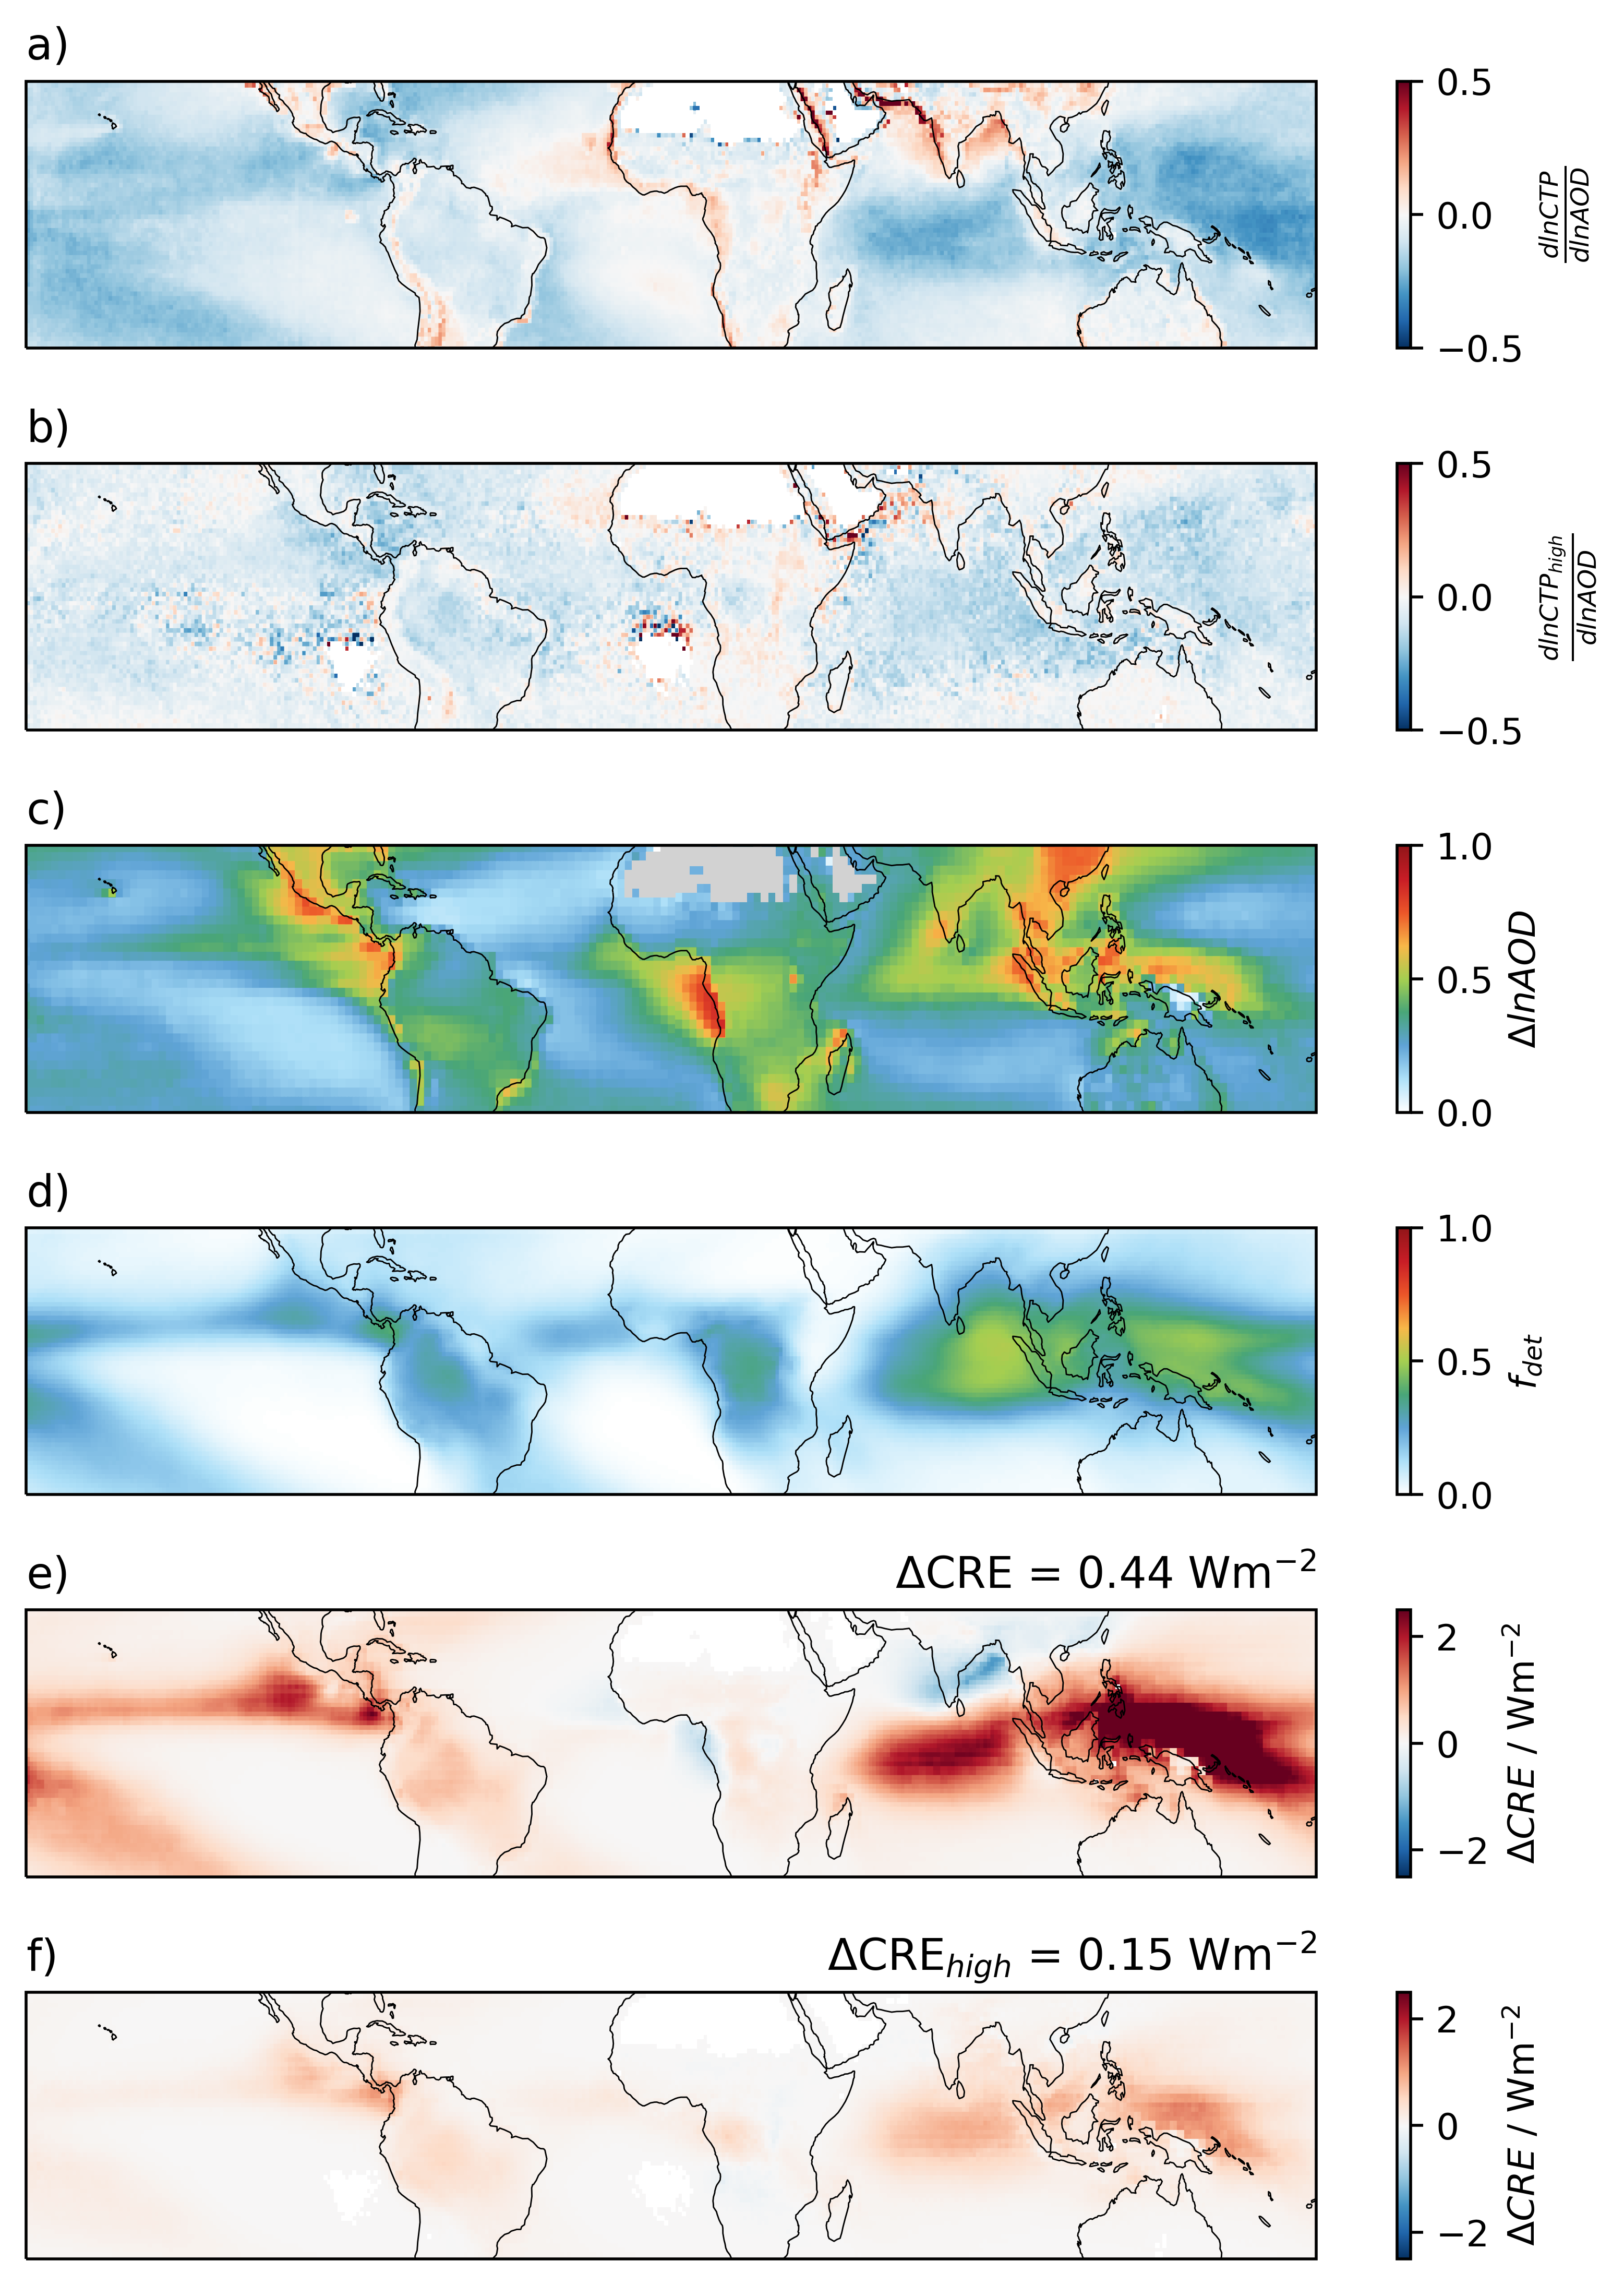

In [23]:
cm = 1/2.54 

c='k'
#import seaborn as sns
fig = plt.figure(dpi=500,figsize=(16.5*cm,22.5*cm))
#sns.set_context('paper')
gs = fig.add_gridspec(6, 1)

img_extent = (0, 360, -30, 30)

ax0 = fig.add_subplot(gs[0, 0], projection=ccrs.PlateCarree(central_longitude=0))
ax0.set_extent([0,180,-29.5,29.5],ccrs.PlateCarree(central_longitude=180))
ax0.coastlines(resolution='auto', color='k',linewidth=0.4)

ax1 = fig.add_subplot(gs[1, 0], projection=ccrs.PlateCarree(central_longitude=0))
ax1.set_extent([0,180,-29.5,29.5],ccrs.PlateCarree(central_longitude=180))
ax1.coastlines(resolution='auto', color='k',linewidth=0.4)

ax2 = fig.add_subplot(gs[2, 0], projection=ccrs.PlateCarree(central_longitude=0))
ax2.set_extent([0,180,-29.5,29.5],ccrs.PlateCarree(central_longitude=180))
ax2.coastlines(resolution='auto', color='k',linewidth=0.4)

ax3 = fig.add_subplot(gs[3, 0], projection=ccrs.PlateCarree(central_longitude=0))
ax3.set_extent([0,180,-29.5,29.5],ccrs.PlateCarree(central_longitude=180))
ax3.coastlines(resolution='auto', color='k',linewidth=0.4)

ax4 = fig.add_subplot(gs[4, 0], projection=ccrs.PlateCarree(central_longitude=0))
ax4.set_extent([0,180,-29.5,29.5],ccrs.PlateCarree(central_longitude=180))
ax4.coastlines(resolution='auto', color='k',linewidth=0.4)

ax5 = fig.add_subplot(gs[5, 0], projection=ccrs.PlateCarree(central_longitude=0))
ax5.set_extent([0,180,-29.5,29.5],ccrs.PlateCarree(central_longitude=180))
ax5.coastlines(resolution='auto', color='k',linewidth=0.4)

im0=ax0.imshow(ctp_sens,origin='lower',cmap='RdBu_r',extent=img_extent,aspect='auto',transform=ccrs.PlateCarree(central_longitude=1),vmax=0.5,vmin=-0.5)
plt.colorbar(im0,ax=ax0,orientation='vertical',label=r'$\frac{d lnCTP}{d lnAOD}$')

im1=ax1.imshow(ctp_sens_high,origin='lower',cmap='RdBu_r',extent=img_extent,aspect='auto',transform=ccrs.PlateCarree(central_longitude=1),vmax=0.5,vmin=-0.5)
plt.colorbar(im1,ax=ax1,orientation='vertical',label=r'$\frac{d lnCTP_{high}}{d lnAOD}$')

im2=ax2.imshow(dlogAOD_rgt[30:90],origin='lower',cmap=cmap,extent=img_extent,aspect='auto',transform=ccrs.PlateCarree(central_longitude=1),vmax=1,vmin=0)
plt.colorbar(im2,ax=ax2,orientation='vertical',label=r'$\Delta lnAOD$')

im3=ax3.imshow(d_heatmap,origin='lower',cmap=cmap,aspect='auto',extent=img_extent,transform=ccrs.PlateCarree(central_longitude=1),vmax=1,vmin=0)
plt.colorbar(im3,ax=ax3,orientation='vertical',label=r'$f_{det}$')

im4=ax4.imshow(dcre_nonlocal_1deg,origin='lower',cmap='RdBu_r',extent=img_extent,aspect='auto',transform=ccrs.PlateCarree(central_longitude=1),vmax=2.5,vmin=-2.5)
plt.colorbar(im4,ax=ax4,orientation='vertical',label=r'$\Delta CRE$ / Wm$^{-2}$')
ax4.set_title(r'$\Delta$CRE = ' +str(np.around(np.nanmean(dcre_nonlocal_1deg),2))+' Wm$^{-2}$',loc='right')

im5=ax5.imshow(dcre_nonlocal_1deg_high,origin='lower',cmap='RdBu_r',extent=img_extent,aspect='auto',transform=ccrs.PlateCarree(central_longitude=1),vmax=2.5,vmin=-2.5)
plt.colorbar(im5,ax=ax5,orientation='vertical',label=r'$\Delta CRE$ / Wm$^{-2}$')
ax5.set_title(r'$\Delta$CRE$_{high}$ = ' +str(np.around(np.nanmean(dcre_nonlocal_1deg_high),2))+' Wm$^{-2}$',loc='right')



ax0.set_title('a)',loc='left')
ax1.set_title('b)',loc='left')
ax2.set_title('c)',loc='left')
ax3.set_title('d)',loc='left')
ax4.set_title('e)',loc='left')
ax5.set_title('f)',loc='left')


plt.tight_layout()
plt.savefig('/net/hardin/disk1/Users/gah20/SensitivityWork/PaperPlots/ctp_sens_high_all_cloud.pdf',bbox_inches='tight',dpi=500)

In [ ]:
np.nanmax(dcre_nonlocal_1deg[0:32,280:320])

In [ ]:
plt.imshow(dcre_nonlocal_1deg_high[0:32,280:320],cmap='RdBu_r',vmin=-2.5,vmax=2.5,origin='lower')

In [ ]:
plt.figure(dpi=500)
plt.imshow(np.load('/net/hardin/disk1/Users/gah20/SensitivityWork/values/dcre_all.npy'),origin='lower',cmap='RdBu_r',vmin=-1,vmax=1)
plt.title(np.nanmean(np.load('/net/hardin/disk1/Users/gah20/SensitivityWork/values/dcre_all.npy')))

In [ ]:
plt.figure(dpi=500)
plt.imshow(np.load('/net/hardin/disk1/Users/gah20/SensitivityWork/values/dcre_ocean.npy')+np.load('/net/hardin/disk1/Users/gah20/SensitivityWork/values/dcre_land.npy') - np.load('/net/hardin/disk1/Users/gah20/SensitivityWork/values/dcre_all.npy'),origin='lower',cmap='RdBu_r',vmin=-0.5,vmax=0.5)


In [ ]:
plt.hist(meanctp.flatten())